In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Вывести информацию о наборе данных.

In [325]:
df = pd.read_csv("Исходные данные.csv", low_memory=False)
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [326]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [327]:
df.shape

(100000, 28)

2. Определить наличие ошибочных записей в признаках.
Исправить ошибочные записи, либо заменить ошибочные записи пропусками. Num_of_Loan

In [328]:
df[['Num_of_Loan']].loc[180:190]

,Num_of_Loan
180,-100
181,0
182,0
183,0
184,-100
185,-100
186,3
187,3
188,3
189,3


In [329]:
uniq = df["Num_of_Loan"].unique() # Поскольку Num_of_Loan: количество кредитов, взятых в банке оно должно быть >= 0 и не содержать _
uniq

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [330]:
zamena = dict()

for i in uniq:
    if '_' in i and i not in zamena:
        correct = i.replace('_', '')
        zamena[i] = correct
        
zamena

{'0_': '0',
 '3_': '3',
 '2_': '2',
 '5_': '5',
 '8_': '8',
 '9_': '9',
 '4_': '4',
 '7_': '7',
 '1_': '1',
 '6_': '6',
 '597_': '597',
 '92_': '92',
 '1347_': '1347',
 '1185_': '1185',
 '235_': '235',
 '1459_': '1459',
 '1320_': '1320',
 '630_': '630',
 '359_': '359',
 '1225_': '1225',
 '131_': '131',
 '1311_': '1311',
 '1129_': '1129',
 '785_': '785',
 '143_': '143',
 '1131_': '1131',
 '27_': '27',
 '1171_': '1171',
 '227_': '227',
 '378_': '378',
 '1219_': '1219',
 '527_': '527',
 '1027_': '1027',
 '696_': '696',
 '1132_': '1132'}

In [331]:
df = df.replace({"Num_of_Loan" : zamena})
df["Num_of_Loan"].unique()

array(['4', '1', '3', '967', '-100', '0', '2', '7', '5', '6', '8', '9',
       '1464', '622', '352', '472', '1017', '945', '146', '563', '341',
       '444', '720', '1485', '49', '737', '1106', '466', '728', '313',
       '843', '597', '617', '119', '663', '640', '92', '1019', '501',
       '1302', '39', '716', '848', '931', '1214', '186', '424', '1001',
       '1110', '1152', '457', '1433', '1187', '52', '1480', '1047',
       '1035', '1347', '33', '193', '699', '329', '1451', '484', '132',
       '649', '995', '545', '684', '1135', '1094', '1204', '654', '58',
       '348', '614', '1363', '323', '1406', '1348', '430', '153', '1461',
       '905', '1312', '1424', '1154', '95', '1353', '1228', '819', '1006',
       '795', '359', '1209', '590', '696', '1185', '1465', '911', '1181',
       '70', '816', '1369', '143', '1416', '455', '55', '1096', '1474',
       '420', '1131', '904', '89', '1259', '527', '1241', '449', '983',
       '418', '319', '23', '238', '638', '138', '235', '280', '1

In [332]:
for i in df["Num_of_Loan"]:
    try:
        int(i)
    except:
        print("Ошибка c", i)
else:
    print("Ошибочных данных нет")

Ошибочных данных нет


In [333]:
df.loc[df['Num_of_Loan'] < '0'] = np.nan
df[['Num_of_Loan']].loc[180:190]

,Num_of_Loan
180,NaN
181,0
182,0
183,0
184,NaN
185,NaN
186,3
187,3
188,3
189,3


3. В соответствии с вариантом преобразовать признаки, которые должны быть количественными в числовой формат.

In [334]:
df["Num_of_Loan"].isna().sum()

3876

In [335]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors='coerce')
df["Num_of_Loan"].isna().sum()

3876

4. Для всех вариантов преобразовать признак "Credit_History_Age" в числовой формат (месяцы).

In [336]:
df[["Credit_History_Age"]].head(10)

,Credit_History_Age
0,22 Years and 1 Months
1,NaN
2,22 Years and 3 Months
3,22 Years and 4 Months
4,22 Years and 5 Months
5,22 Years and 6 Months
6,22 Years and 7 Months
7,NaN
8,26 Years and 7 Months
9,26 Years and 8 Months


In [337]:
cha = list(map(lambda x: int(x.split()[0]) * 12 + int(x.split()[3]) if x is not np.NaN else x, df["Credit_History_Age"].tolist()))
cha

[265,
 nan,
 267,
 268,
 269,
 270,
 271,
 nan,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 213,
 214,
 215,
 nan,
 217,
 218,
 219,
 220,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 nan,
 368,
 369,
 nan,
 371,
 372,
 373,
 374,
 nan,
 nan,
 384,
 nan,
 386,
 387,
 nan,
 389,
 390,
 367,
 368,
 369,
 370,
 371,
 nan,
 373,
 374,
 nan,
 176,
 177,
 178,
 179,
 nan,
 181,
 182,
 nan,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 nan,
 318,
 319,
 320,
 321,
 nan,
 nan,
 324,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 nan,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 107,
 108,
 109,
 110,
 111,
 112,
 nan,
 114,
 218,
 219,
 220,
 221,
 222,
 nan,
 224,
 225,
 202,
 203,
 204,
 205,
 206,
 207,
 nan,
 209,
 350,
 351,
 352,
 nan,
 354,
 nan,
 356,
 357,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 218,
 219,
 nan,
 221,
 nan,
 223,
 224,
 225,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,


In [338]:
df["Credit_History_Age"] = cha
df[["Credit_History_Age"]].head(10)

,Credit_History_Age
0,265.0
1,NaN
2,267.0
3,268.0
4,269.0
5,270.0
6,271.0
7,NaN
8,319.0
9,320.0


5. Определить наличие аномальных значений, которые не соответствуют физической природе признаков. Заменить аномальные значения пропусками.

In [339]:
df[["Age"]].head(10)

,Age
0,23
1,23
2,-500
3,23
4,23
5,23
6,23
7,23
8,28_
9,28


In [340]:
ages = df["Age"].unique()
ages

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [341]:
z = dict()

for age in ages:
    if age is not np.nan and '_' in age:
        correct = age.replace('_', '')
        z[age] = correct

z

{'28_': '28',
 '34_': '34',
 '30_': '30',
 '24_': '24',
 '33_': '33',
 '35_': '35',
 '40_': '40',
 '37_': '37',
 '54_': '54',
 '21_': '21',
 '20_': '20',
 '43_': '43',
 '38_': '38',
 '18_': '18',
 '2111_': '2111',
 '46_': '46',
 '16_': '16',
 '19_': '19',
 '47_': '47',
 '53_': '53',
 '25_': '25',
 '27_': '27',
 '55_': '55',
 '42_': '42',
 '48_': '48',
 '49_': '49',
 '50_': '50',
 '32_': '32',
 '22_': '22',
 '17_': '17',
 '29_': '29',
 '15_': '15',
 '51_': '51',
 '31_': '31',
 '26_': '26',
 '39_': '39',
 '14_': '14',
 '36_': '36',
 '44_': '44',
 '7670_': '7670',
 '45_': '45',
 '23_': '23',
 '41_': '41',
 '52_': '52',
 '733_': '733',
 '5769_': '5769',
 '4383_': '4383',
 '56_': '56',
 '2650_': '2650',
 '3307_': '3307',
 '6962_': '6962',
 '5589_': '5589',
 '6556_': '6556',
 '1447_': '1447',
 '8153_': '8153',
 '3834_': '3834',
 '6744_': '6744',
 '6471_': '6471',
 '7723_': '7723',
 '6408_': '6408',
 '3502_': '3502',
 '7316_': '7316',
 '1102_': '1102',
 '8669_': '8669',
 '2463_': '2463',
 '30

In [342]:
df = df.replace({'Age' : z})
df[['Age']]

,Age
0,23
1,23
2,-500
3,23
4,23
...,...
99995,25
99996,25
99997,25
99998,25


In [343]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age']

0         23.0
1         23.0
2       -500.0
3         23.0
4         23.0
         ...  
99995     25.0
99996     25.0
99997     25.0
99998     25.0
99999     25.0
Name: Age, Length: 100000, dtype: float64

In [344]:
df[(df['Age'] < 18) | (df['Age'] > 115)].shape

(8174, 28)

В датасете 8174 строк где возраст < 18 (Нельзя оформить кредитную карту) или > 115 (Люди столько не живут (Больше рекорда долголетия))

In [349]:
df.loc[(df['Age'] < 18) | (df['Age'] > 115), 'Age'] = np.nan
df[['Age']].head(10)

,Age
0,23.0
1,23.0
2,NaN
3,23.0
4,23.0
5,23.0
6,23.0
7,23.0
8,28.0
9,28.0


In [350]:
df[['Num_of_Loan', 'Type_of_Loan', 'Monthly_Balance']].isna().sum()

Num_of_Loan         3876
Type_of_Loan       14867
Monthly_Balance     5034
dtype: int64

In [351]:
NoL, ToL, MB = df['Num_of_Loan'], df['Type_of_Loan'], df['Monthly_Balance']

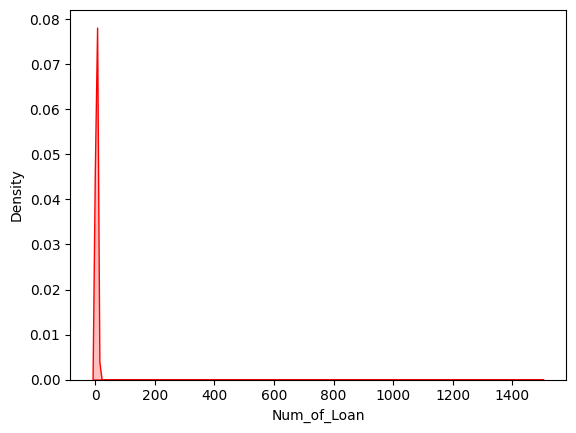

In [354]:
df['values'].plot.kde(bw_method=0.5, color='red')
plt.show()